In [6]:
import os 
os.environ["OMP_NUM_THREADS"] = "1"

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale

In [2]:
df = pd.read_csv("mixture.csv", sep=",")

In [3]:
print(df.shape)
print(df.info())
display(df.head())

(100, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       100 non-null    float64
 1   Y       100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB
None


,X,Y
0,0.587460,7.901551
1,-5.019304,-4.876149
2,-6.505591,-2.445019
3,0.772204,3.574519
4,-5.790933,-3.226195


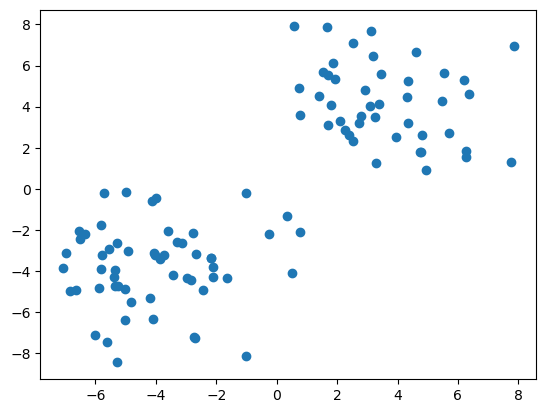

In [5]:
plt.scatter(df["X"], df["Y"], marker="o")
plt.show()

In [9]:
dfx_scaled = scale(df)
dfx_scaled.mean(axis=0)

array([ 2.33146835e-17, -5.10702591e-17])

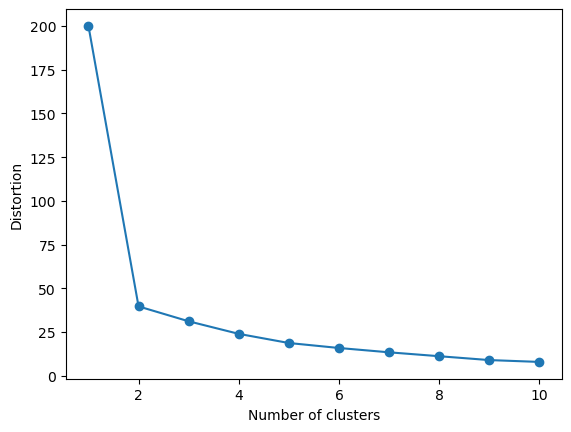

In [10]:
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, n_init=10)
    km.fit(dfx_scaled)
    distortions.append(km.inertia_)
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [13]:
n_cls=2
km=KMeans(n_clusters=n_cls, n_init=10, random_state=10)
cls=km.fit_predict(dfx_scaled)
print(cls)

[0 1 1 0 1 1 1 1 1 1 1 0 0 1 0 0 0 0 0 1 0 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 0
 1 1 0 0 1 0 1 1 1 1 1 0 1 0 1 1 1 1 0 1 0 0 1 1 0 1 0 1 0 0 0 0 0 1 1 0 0
 0 1 1 0 1 0 0 1 0 1 1 1 1 1 1 0 1 1 0 0 1 0 0 1 1 0]


In [14]:
df["cluster_no"] = cls
display(df.head())
print(df["cluster_no"].value_counts())

,X,Y,cluster_no
0,0.587460,7.901551,0
1,-5.019304,-4.876149,1
2,-6.505591,-2.445019,1
3,0.772204,3.574519,0
4,-5.790933,-3.226195,1


cluster_no
1    56
0    44
Name: count, dtype: int64


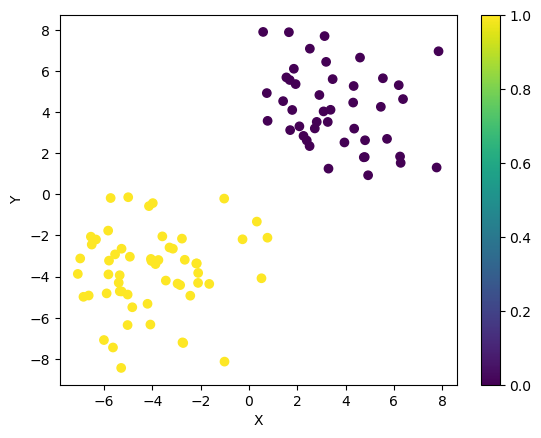

In [15]:
plt.scatter(df['X'], df['Y'], 
            marker='o', c=df['cluster_no'])
plt.colorbar()
plt.xlabel('X')
plt.ylabel('Y')
plt.show()